In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

2020-12-07 08:32:24 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


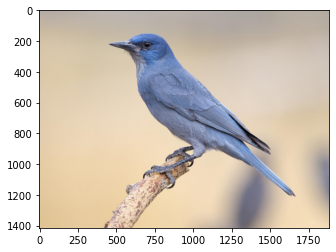

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img)

In [3]:
from torchvision import transforms as T

trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

inp = trf(img).unsqueeze(0)

In [4]:
out = fcn(inp)['out']
out.shape

torch.Size([1, 21, 224, 224])

In [5]:
import numpy as np

om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)
print(np.unique(om))

(224, 224)
[0 3]


In [6]:
def decode_segmap(image, nc=21):

    label_colors = np.array([# 0=background,
                             (0, 0, 0),  
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

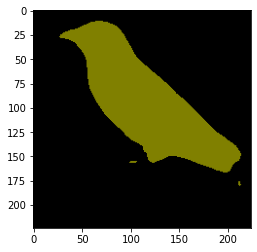

In [7]:
rgb = decode_segmap(om)
plt.imshow(rgb)

In [8]:
def segment(net, path, show_orig=True, dev='cuda'):
    img = Image.open(path)
    if show_orig:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    
    trf = T.Compose([T.Resize(256),
                    T.ToTensor(),
                    T.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])])
    
    inp = trf(img).unsqueeze(0).to(dev)
    out = net.to(dev)(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

2020-12-07 08:32:27 URL:https://seriouslyequestrian.com/wp-content/uploads/2020/05/Arabian-Horse.jpg [77442] -> "horse.png" [1]


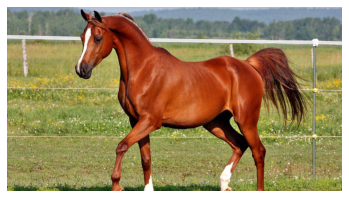

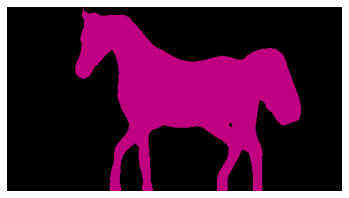

In [9]:
!wget -nv "https://seriouslyequestrian.com/wp-content/uploads/2020/05/Arabian-Horse.jpg" -O horse.png
segment(fcn, './horse.png')

2020-12-07 08:32:32 URL:https://media.istockphoto.com/photos/woman-helping-blind-man-while-crossing-road-picture-id949183526?k=6&m=949183526&s=612x612&w=0&h=WSCSe1WyCMskXJpe0vqmGDzar7FfLIgLYfcCkt4dClU= [42957/42957] -> "person.png" [1]


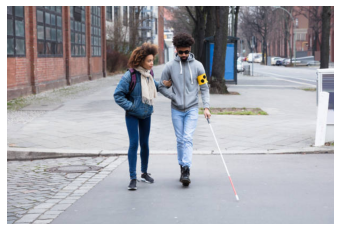

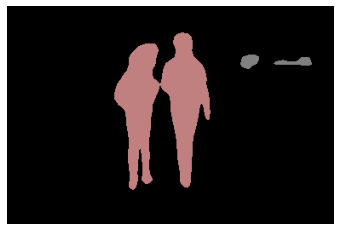

In [10]:
!wget -nv "https://media.istockphoto.com/photos/woman-helping-blind-man-while-crossing-road-picture-id949183526?k=6&m=949183526&s=612x612&w=0&h=WSCSe1WyCMskXJpe0vqmGDzar7FfLIgLYfcCkt4dClU=" -O person.png
segment(fcn, './person.png')

2020-12-07 08:32:35 URL:https://awsimages.detik.net.id/community/media/visual/2020/07/16/physical-distancing-di-traffic-light-ciamis-serasa-mau-start-balapan_169.jpeg?w=700&q=90 [106756/106756] -> "traffic.png" [1]


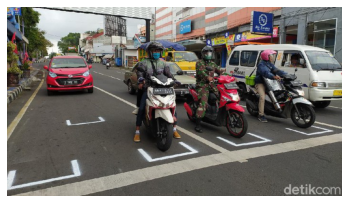

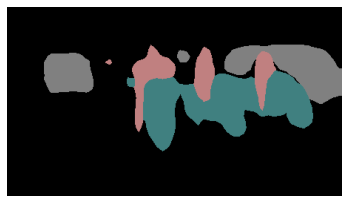

In [11]:
!wget -nv "https://awsimages.detik.net.id/community/media/visual/2020/07/16/physical-distancing-di-traffic-light-ciamis-serasa-mau-start-balapan_169.jpeg?w=700&q=90" -O traffic.png
segment(fcn, './traffic.png')